## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

#### 교과목명 : 머신러닝알고리즘 이해 및 활용
- 평가일 : 10.14
- 성명 : 이정현
- 점수 : 80

Q1. iris data를 불러와서 아래 사항을 수행하세요.

- 결정트리 모델을 시각화하고 주요한 인사이트를 기술하세요.(tree.plot_tree or tree.export_graphviz 이용)
- Feature importance를 추출하고 시각화하세요.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)

iris_data = load_iris()
X_train,X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
creport = classification_report(y_test,pred)

print(f'정확도 :{accuracy:.4f}','\n')
print(f'classification report : \n {creport}')

정확도 :0.9333 

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



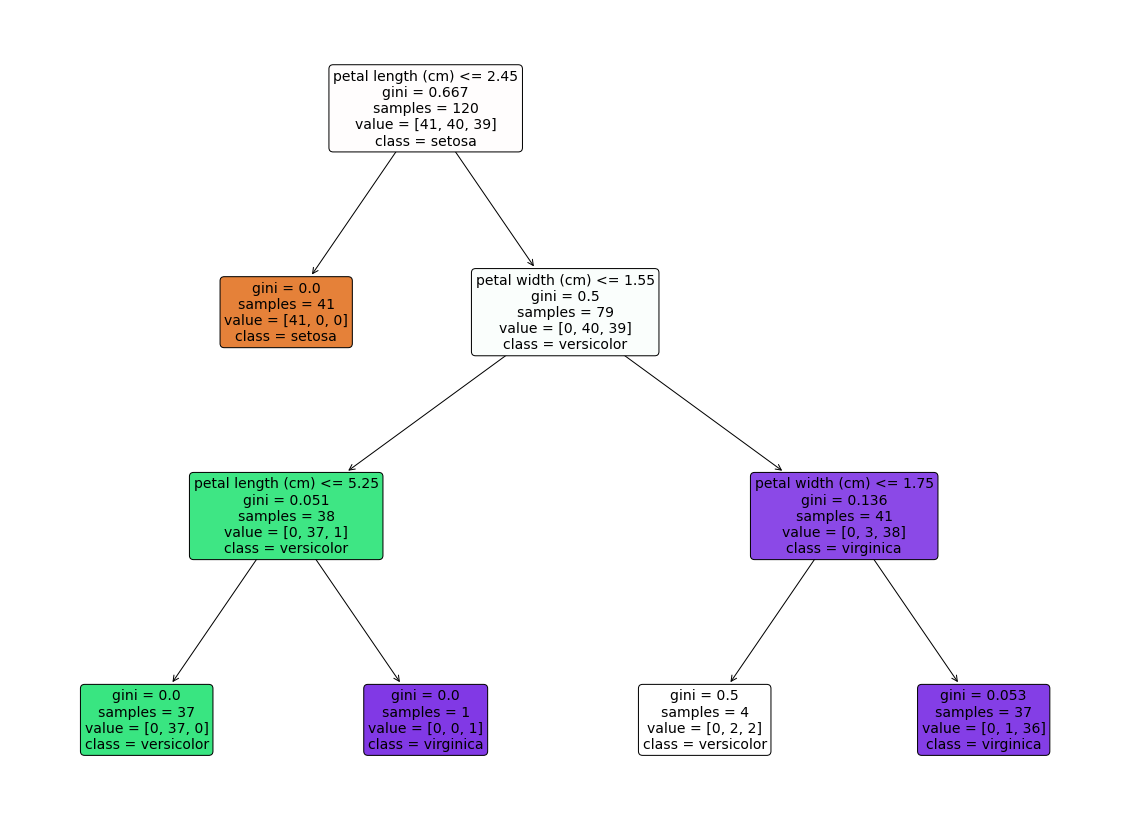

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True,
              feature_names=iris_data.feature_names,
              class_names=iris_data.target_names,
              rounded=True, fontsize=14)
plt.show()
plt.close()

Feature Importances: 
 [0.    0.    0.558 0.442] 

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442



<AxesSubplot:>

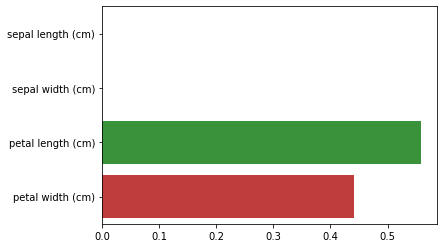

In [6]:
import seaborn as sns
import numpy as np

print(f'Feature Importances: \n {np.round(dt_clf.feature_importances_,3)}','\n')
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')
print()
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

Q2~Q3. 'dataset/creditcard.csv'를 불러와서 신용카드 사기 검출 분류문제를 아래와 같이 수행하세요
- 로지스틱 리그레션을 적용한 모델 학습 및 사용자 함수를 이용하여 평가
    - 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 df 반환하는 사용자 함수 생성
    - 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수(테스트 사이즈 0.3)
    - 오차행렬, 정확도, 정밀도, 재현율, f1, AUC 평가 함수
    
- 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서  학습/예측/평가 수행
    - 사용자 함수를 사용하여 LightGBM으로 모델을 학습한 뒤 별도의 테스트 데이터 세트에서 예측 평가를 수행. 단, n_estimators=1000, num_leaves=64 적용<br>  ※ 레이블 값이 극도로 불균형한 분포를 가지고 있는 경우 boost_from_average=False로 파라미터 설정(default=True). default 설정은 재현율, AUC 성능을 매우 크게 저하시킴
    - 넘파이의 np.log1p( )를 이용하여 Amount를 로그 변환하는 사용자 함수 생성
    - Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

card_df = pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [77]:
# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 df 반환하는 사용자 함수 생성
from sklearn.model_selection import train_test_split
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

In [78]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수(테스트 사이즈 0.3)
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.3,random_state=0,\
                                                     stratify=y_target)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [79]:
#오차행렬, 정확도, 정밀도, 재현율, f1, AUC 평가 함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [80]:
# 로지스틱 리그레션을 적용한 모델 학습 및 사용자 함수를 이용하여 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차 행렬
[[85280    15]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8611, 재현율: 0.6284,    F1: 0.7266, AUC:0.9557


In [81]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None,ftr_test=None,tgt_train=None,tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

In [82]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


Q4. Q2 신용카드 사기 검출 분류문제에서 아래를 참고하여 이상치 데이터를 제거하고 모델 학습/예측/평가를 수행하세요
- 히트맵을 이용해 레이블과의 상관성을 시각화 
- 레이블과 상관성이 높은 피처를 위주로 이상치 검출하는 사용자 함수 생성
- 사용자 함수를 이용하여 이상치 검출
- 이상치 제거 사용자 함수를 이용하여 이상치 제거 후 로지스틱 회귀 및 LightGBM 수행 및 평가

<AxesSubplot:>

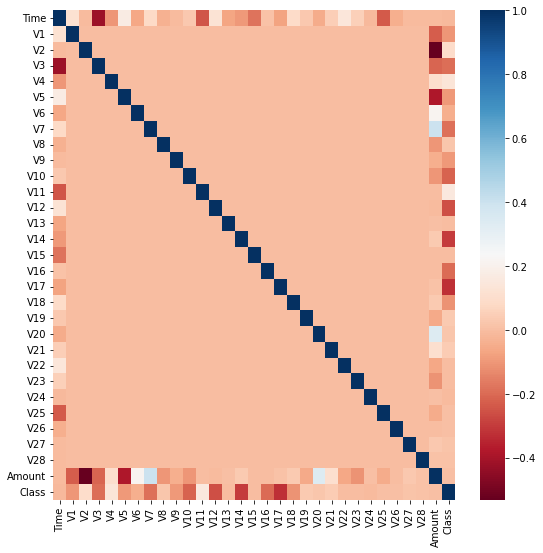

In [83]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()           ## dataframe의 각 피처별로 상관도를 구함
sns.heatmap(corr, cmap='RdBu')  ## 상관도를 시본의 heatmap으로 시각화 

In [84]:
# 피처 선정 - V14 (class와 음의 상관관계가 가장 높은 V14, V17 중 V14에 대해 이상치 검출 후 제거 수행할 것임)
import numpy as np

def get_outlier(df, column, weight=1.5):
  
    fraud = df[df['Class']==1][column]
    q_25 = np.percentile(fraud.values, 25)
    q_75 = np.percentile(fraud.values, 75)

    iqr = q_75 - q_25
    iqr_weight = iqr * weight

    low_val = q_25 - iqr_weight
    high_val = q_75 + iqr_weight

    outlier_index = fraud[(fraud < low_val) | (fraud > high_val)].index

    return outlier_index

In [85]:
outlider_index = get_outlier(card_df, 'V14', 1.5)
outlider_index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [86]:
def get_preprocessed_df(df=None):

    df_copy = df.copy()

    amount_n = np.log1p(df_copy['Amount'])

    df_copy.insert(0, 'Amount_Scaled', amount_n)

    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    outlier_index = get_outlier(df_copy, 'V14', 1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)

    return df_copy

In [87]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [88]:
print('## logistic regression ##')
lr_clf = LogisticRegression(
    max_iter=1000
)
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('## lightgbm ##')
lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1
)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

## logistic regression ##
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
## lightgbm ##
오차 행렬
[[85268    27]
 [   36   110]]
정확도: 0.9993, 정밀도: 0.8029, 재현율: 0.7534,    F1: 0.7774, AUC:0.9219


Q5. SMOTE 오버 샘플링 적용 후 LightGBM 모델을 이용하여 학습, 예측, 평가를 수행하세요.

In [91]:
!pip3 install imblearn

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

## SMOTE 오버 샘플링 적용
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 데이터셋:')
print(X_train.shape, y_train.shape)
print()

print('SMOTE 적용 후 학습용 데이터셋:')
print(X_train_over.shape, y_train_over.shape)
print()

## SMOTE 적용 후 레이블 값 분포
print('SMOTE 적용 후 레이블 값 분포:')
print(pd.Series(y_train_over).value_counts())
print()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print('## logistic regression ##')
lr_clf = LogisticRegression(
    max_iter=1000
)
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

print('## lightgbm ##')
lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1
)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

Q6. 사이킷런에서 제공해주는 load_boston 데이터셋을 가져와서 아래 사항을 수행하세요.
- 데이터셋의 타겟 이름을 'PRICE'로 지정한 후 데이터프레임을 생성 pickle 파일로 저장 후 다시 불어오세요.
- 히트맵을 이용하여 타겟과 상관관계가 높은 독립 변수를 선택하세요.
- 종속변수를 로그 변환하세요
- 위의 사항을 반영하여 선회회귀 모델을 생성 후 평가하고 회귀계수를 출력하세요.

In [7]:
# 데이터셋의 타겟 이름을 'PRICE'로 지정한 후 데이터프레임을 생성 pickle 파일로 저장 후 다시 불어오세요.
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
pd.to_pickle(bostonDF,'./bostonDF.pkl')

In [10]:
bostonDF = pd.read_pickle('./bostonDF.pkl')
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

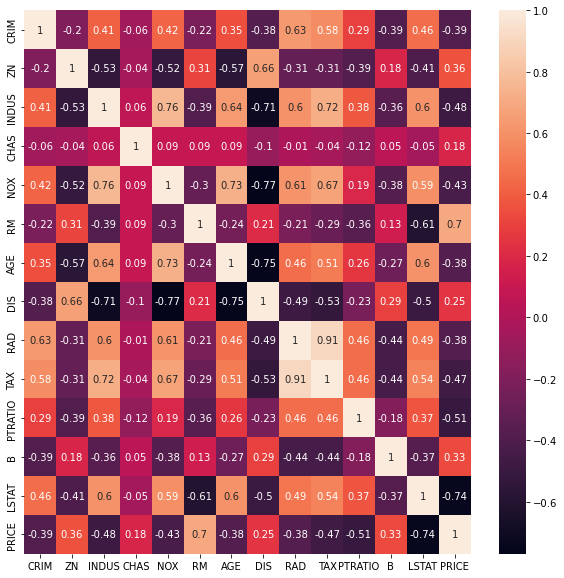

In [11]:
#히트맵을 이용하여 타겟과 상관관계가 높은 독립 변수를 선택하세요.
corr_matrix = bostonDF.corr().round(2)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=corr_matrix, annot=True)

 'price'와 강한 상관관계를 가지는 독립변수는 'LSTAT'와 'RM'

In [14]:
#종속변수를 로그 변환하세요
#위의 사항을 반영하여 선회회귀 모델을 생성 후 평가하고 회귀계수를 출력하세요.
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = pd.DataFrame(np.c_[bostonDF["LSTAT"], bostonDF["RM"]], columns=["LSTAT", "RM"])
y = bostonDF["PRICE"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# 학습
model = LinearRegression()
model.fit(x_train, y_train)


# train set에 대한 모델 평가
y_train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("train set")
print("price is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")

# test set에 대한 모델 평가
y_train_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_train_predict)))
r2 = r2_score(y_test, y_train_predict)
print("train set")
print("price is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")

train set
price is 5.6371293350711955
R2 Score is 0.6300745149331701


train set
price is 5.137400784702911
R2 Score is 0.6628996975186953




Q7. house_df.pkl 데이터셋을 불러와서 아래사항을 수행하세요.
- alphas = [0, 0.1, 1, 10, 100] 를 적용하여 Ridge 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력 
- lasso_alphas = [0.07,0.1,0.5,1,3] 를 적용, Lasso 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력(def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True 사용자 함수 이용) 
- elastic_alphas = [0.07,0.1,0.5,1,3] 를 적용, ElasticNet 회귀 모델링 및 교차검증 후 5 폴드 평균 RMSE를 출력(사용자 함수 이용)

In [25]:
house = load_boston()
house_df = pd.DataFrame(house.data, columns=house.feature_names)
house_df.to_pickle('house_df.pkl')

In [26]:
house_df = pd.read_pickle('house_df.pkl')
house_df['PRICE'] = house.target
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
# alphas = [0, 0.1, 1, 10, 100] 를 적용하여 Ridge 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력

import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

y_target = house_df['PRICE']
X_data = house_df.drop(['PRICE'],axis=1,inplace=False)

alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, x,y, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {alpha}일 때, 평균 RMSE : {np.round(avg_rmse,4)}')

alpha 0일 때, 평균 RMSE : 0.6344
alpha 0.1일 때, 평균 RMSE : 0.6341
alpha 1일 때, 평균 RMSE : 0.6316
alpha 10일 때, 평균 RMSE : 0.6135
alpha 100일 때, 평균 RMSE : 0.59


In [45]:
# lasso_alphas = [0.07,0.1,0.5,1,3] 를 적용, Lasso 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력(def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True 사용자 함수 이용)
from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('##### ', model_name , '#####')
    for param in params:
        if model_name == 'Ridge': model=Ridge(alpha=param)
        elif model_name == 'Lasso':model=Lasso(alpha=param)
        elif model_name == 'ElasticNet':model=ElasticNet(alpha=param,l1_ratio=0.7)
            
        neg_mse_scores = cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha {param}일때 평균 RMSE:{np.round(avg_rmse,4)}')
        model.fit(X_data_n,y_target_n)
        coeff = pd.Series(data=model.coef_,index=X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [47]:
# 라쏘 회귀
lasso_alphas = [0.07,0.1,0.5,1.3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)
coeff_lasso_df

#####  Lasso #####
alpha 0.07일때 평균 RMSE:5.6123
alpha 0.1일때 평균 RMSE:5.6151
alpha 0.5일때 평균 RMSE:5.6691
alpha 1.3일때 평균 RMSE:5.8451


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
CRIM,-0.098193,-0.097894,-0.083289,-0.051638
ZN,0.049059,0.049211,0.049544,0.048850
INDUS,-0.042120,-0.036619,-0.005253,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.789725,3.703202,2.498212,0.018113
AGE,-0.011706,-0.010037,0.003604,0.031350
DIS,-1.176583,-1.160538,-0.936605,-0.511309
RAD,0.270936,0.274707,0.277451,0.255433
TAX,-0.014290,-0.014570,-0.015442,-0.014981


In [38]:
def get_linear_reg_el_eval(model_name, params=None, l1_ratios = None, x_data_n = None, y_target_n=None, return_coeff=True, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params:
        for l1_ratio in l1_ratios:
            if model_name == 'Ridge': model = Ridge(alpha=param)
            elif model_name == 'Lasso' : model = Lasso(alpha=param)
            elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio= l1_ratio)
            neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
            avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
            print(f'alpha {param}이고 l1_ratio가 {l1_ratio}일 때, 5폴드 세트의 평균 RMSE : {np.round(avg_rmse,3)}')

            model.fit(x_data_n, y_target_n)
            if return_coeff:
                coeff = pd.Series(data=model.coef_, index=x_data_n.columns)
                colname='alpha:'+str(param)
                coeff_df[colname] = coeff
    return coeff_df

In [48]:
# elastic_alphas = [0.07,0.1,0.5,1,3] 를 적용, ElasticNet 회귀 모델링 및 교차검증 후 5 폴드 평균 RMSE를 출력(사용자 함수 이용)
elastic_alphas = [0.07,0.1,0.5,1,3]
l1_ratios = [0, 0.1, 0.5, 0.7, 1]
coeff_elastic_df = get_linear_reg_el_eval('ElasticNet', params=elastic_alphas, l1_ratios = l1_ratios, x_data_n=x,y_target_n=y)
coeff_elastic_df

###### ElasticNet ######
alpha 0.07이고 l1_ratio가 0일 때, 5폴드 세트의 평균 RMSE : 0.597


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Q8. load_boston 데이터셋을 불러와서 다음사항을 수행하세요.
- SVM 알고리즘을 활용한 주택가격 예측모델 생성 및 평가(MSE, RMSE, R2)
- 개발된 예측모델을 활용하여 아래 test_data가 주어졌은때의 주택가격 예측<br>
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]

In [15]:
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

boston = load_boston()
x, y = boston.data, boston.target

# StandardScale
x = scale(x)
y = scale(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3)

svr = SVR(kernel='rbf', gamma='auto')
svr.fit(xtrain, ytrain)

SVR(gamma='auto')

In [19]:
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]

score = svr.score(xtrain, ytrain)
print("R-squared: ", score)

cv_score = cross_val_score(svr, x, y, cv=5)
print("CV mean score: ", cv_score.mean())

ypred = svr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)

R-squared:  0.8945738443427552
CV mean score:  0.49118303214858317
MSE:  0.18084495642539739


Q9. mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 
큰 값을 가지는 레코드 수를 구하시오

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv',index_col=0)
X = df['qsec']
X_MinMax = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

overNum = len(X_MinMax[X_MinMax>0.5])

In [22]:
overNum

9

Q10. purdata.csv는 백화점 고객의 1년 간 구매 데이터이다. 아래사항을 수행하세요.
 
- 남성고객을 분류하는 모델을 생성(분류알고리즘 : dt,rf,lr)
- 모델 성능을 roc_auc로 평가 

In [92]:
df = pd.read_csv('./purdata.csv')
df.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,*,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,*,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0
